In [98]:
!pip install tensorflow
!pip install xgboost

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
You should consider upgrading via the '/opt/conda/bin/python -m pip install --upgrade pip' command.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached xgboost-1.5.2-py3-none-manylinux2014_x86_64.whl (173.6 MB)
You should

In [99]:
# Load libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from xgboost import XGBClassifier, XGBRFClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

#Libraries for Saving the Model
from pickle import dump
from pickle import load

In [4]:
loans = pd.read_csv('https://github.com/tatsath/fin-ml/raw/master/Chapter%206%20-%20Sup.%20Learning%20-%20Classification%20models/CaseStudy2%20-%20Loan%20Default%20Probability/LoansData_sample.csv.gz', compression='gzip', encoding='utf-8')

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
loans

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,0,38098114,NaN,15000.0,15000.0,15000.0,60 months,12.39,336.64,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1,36805548,NaN,10400.0,10400.0,10400.0,36 months,6.99,321.08,A,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,2,37842129,NaN,21425.0,21425.0,21425.0,60 months,15.59,516.36,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,3,37612354,NaN,12800.0,12800.0,12800.0,60 months,17.14,319.08,D,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,4,37662224,NaN,7650.0,7650.0,7650.0,36 months,13.66,260.20,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,99995,22454240,NaN,8400.0,8400.0,8400.0,36 months,9.17,267.79,B,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99996,99996,11396920,NaN,10000.0,10000.0,10000.0,36 months,12.99,336.90,C,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99997,99997,8556176,NaN,30000.0,30000.0,30000.0,60 months,20.99,811.44,E,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
99998,99998,24023408,NaN,8475.0,8475.0,8475.0,36 months,24.99,336.92,F,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
dataset = loans

### 3. Data Preparation and Feature Selection



In [8]:
dataset["loan_status"].value_counts()

Fully Paid            69982
Charged Off           16156
Current               12726
Late (31-120 days)      730
In Grace Period         264
Late (16-30 days)       139
Default                   3
Name: loan_status, dtype: int64

In [9]:
dataset = dataset.loc[dataset["loan_status"].isin(["Fully Paid","Charged Off"])]
dataset["loan_status"].value_counts(normalize=True,dropna=False)

Fully Paid     0.812441
Charged Off    0.187559
Name: loan_status, dtype: float64

In [10]:
dataset["charged_off"] = (dataset["loan_status"] == "Charged Off").apply(np.uint8)

In [11]:
dataset.drop("loan_status",axis=1,inplace=True)

In [12]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)

In [13]:
missing_fractions.head(10)

total_cu_tl                            1.0
max_bal_bc                             1.0
sec_app_mort_acc                       1.0
sec_app_open_acc                       1.0
sec_app_revol_util                     1.0
sec_app_open_act_il                    1.0
sec_app_num_rev_accts                  1.0
sec_app_chargeoff_within_12_mths       1.0
sec_app_collections_12_mths_ex_med     1.0
sec_app_mths_since_last_major_derog    1.0
dtype: float64

In [14]:
drop_list = sorted(list(missing_fractions[missing_fractions > 0.3].index))

In [15]:
drop_list

['all_util',
 'annual_inc_joint',
 'debt_settlement_flag_date',
 'deferral_term',
 'desc',
 'dti_joint',
 'hardship_amount',
 'hardship_dpd',
 'hardship_end_date',
 'hardship_last_payment_amount',
 'hardship_length',
 'hardship_loan_status',
 'hardship_payoff_balance_amount',
 'hardship_reason',
 'hardship_start_date',
 'hardship_status',
 'hardship_type',
 'il_util',
 'inq_fi',
 'inq_last_12m',
 'max_bal_bc',
 'member_id',
 'mths_since_last_delinq',
 'mths_since_last_major_derog',
 'mths_since_last_record',
 'mths_since_rcnt_il',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_revol_delinq',
 'next_pymnt_d',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'open_rv_12m',
 'open_rv_24m',
 'orig_projected_additional_accrued_interest',
 'payment_plan_start_date',
 'revol_bal_joint',
 'sec_app_chargeoff_within_12_mths',
 'sec_app_collections_12_mths_ex_med',
 'sec_app_earliest_cr_line',
 'sec_app_fico_range_high',
 'sec_app_fico_range_low',
 'sec_app_inq_last_6mths',
 'se

In [16]:
dataset.drop(labels=drop_list, axis=1, inplace=True)
dataset.shape

(86138, 93)

In [17]:
sorted([2,3,4,5,6])

[2, 3, 4, 5, 6]

In [18]:
keep_list = ['charged_off','funded_amnt','addr_state', 'annual_inc', 'application_type', 'dti', 'earliest_cr_line', 'emp_length', 'emp_title', 'fico_range_high', 'fico_range_low', 'grade', 'home_ownership', 'id', 'initial_list_status', 'installment', 'int_rate', 'loan_amnt', 'loan_status', 'mort_acc', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 'verification_status', 'zip_code','last_pymnt_amnt','num_actv_rev_tl', 'mo_sin_rcnt_rev_tl_op','mo_sin_old_rev_tl_op',"bc_util","bc_open_to_buy","avg_cur_bal","acc_open_past_24mths" ]

len(keep_list)

40

In [19]:
drop_list = [col for col in dataset.columns if col not in keep_list]

dataset.drop(labels=drop_list,axis=1,inplace=True)

In [20]:
dataset.shape

(86138, 39)

In [21]:
dataset

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,pub_rec_bankruptcies,charged_off
0,38098114,15000.0,15000.0,60 months,12.39,336.64,C,C1,MANAGEMENT,10+ years,...,5.0,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0,0.0,0
1,36805548,10400.0,10400.0,36 months,6.99,321.08,A,A3,Truck Driver Delivery Personel,8 years,...,7.0,9536.0,7599.0,41.5,290.0,1.0,1.0,9.0,0.0,1
2,37842129,21425.0,21425.0,60 months,15.59,516.36,D,D1,Programming Analysis Supervisor,6 years,...,4.0,4232.0,324.0,97.8,136.0,7.0,0.0,4.0,0.0,0
4,37662224,7650.0,7650.0,36 months,13.66,260.20,C,C3,Technical Specialist,< 1 year,...,6.0,5857.0,332.0,93.2,148.0,8.0,0.0,4.0,0.0,1
5,37822187,9600.0,9600.0,36 months,13.66,326.53,C,C3,Admin Specialist,10+ years,...,8.0,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,21491171,15000.0,15000.0,36 months,10.15,485.07,B,B2,Senior Clinical Business Solutions Analy,10+ years,...,5.0,14311.0,28091.0,31.3,356.0,3.0,5.0,5.0,0.0,0
99995,22454240,8400.0,8400.0,36 months,9.17,267.79,B,B1,Software Engineer,2 years,...,2.0,25364.0,2505.0,77.2,287.0,5.0,1.0,2.0,0.0,0
99996,11396920,10000.0,10000.0,36 months,12.99,336.90,C,C1,Assistant Professor of English,3 years,...,3.0,4219.0,13974.0,42.5,158.0,5.0,0.0,5.0,0.0,0
99998,24023408,8475.0,8475.0,36 months,24.99,336.92,F,F4,Records Examiner Analyst,10+ years,...,8.0,3125.0,324.0,88.0,164.0,7.0,0.0,3.0,1.0,1


### 3.2.3. Features elimination based on the correlation


In [22]:
correlation = dataset.corr()

In [23]:
correlation.chargeOff = abs(correlation["charged_off"])

In [24]:
correlation.chargeOff.sort_values(ascending=False)


charged_off              1.000000
last_pymnt_amnt          0.319081
int_rate                 0.282825
dti                      0.123108
fico_range_low           0.121892
fico_range_high          0.121891
acc_open_past_24mths     0.105989
bc_open_to_buy           0.080077
bc_util                  0.077744
avg_cur_bal              0.071977
num_actv_rev_tl          0.071185
revol_util               0.066188
funded_amnt              0.060818
loan_amnt                0.060818
mort_acc                 0.057858
annual_inc               0.050349
mo_sin_old_rev_tl_op     0.049426
mo_sin_rcnt_rev_tl_op    0.048839
open_acc                 0.039430
installment              0.032847
revol_bal                0.021714
pub_rec                  0.016023
pub_rec_bankruptcies     0.015815
total_acc                0.005804
id                       0.002221
Name: charged_off, dtype: float64

In [25]:
drop_list_corr = sorted(list(correlation.chargeOff[correlation.chargeOff< 0.03].index))

In [26]:
dataset.drop(labels=drop_list_corr,axis=1,inplace=True)

### 4. Feature Engineering and Exploratory Analysis

In [27]:
dataset.describe()

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,fico_range_low,fico_range_high,open_acc,revol_util,last_pymnt_amnt,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off
count,86138.000000,86138.000000,86138.000000,86138.000000,8.613800e+04,86138.000000,86138.000000,86138.000000,86138.000000,86094.000000,86138.000000,86138.000000,86138.000000,85142.000000,85089.000000,86138.000000,86138.000000,86138.000000,86138.000000,86138.000000
mean,14106.526446,14106.526446,13.002360,430.737187,7.384311e+04,18.532747,692.462966,696.463024,11.746453,54.582777,4757.453184,4.594732,13066.638371,8942.506507,63.808959,183.524333,12.796896,1.748880,5.762358,0.187559
std,8391.139221,8391.139221,4.397419,251.653139,5.929352e+04,8.538247,29.731549,29.731848,5.433122,23.515901,6466.767327,3.070996,16232.739293,14100.186250,27.051347,93.266430,16.224586,2.091488,3.224598,0.390362
min,1000.000000,1000.000000,6.000000,30.420000,4.000000e+03,0.000000,660.000000,664.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,7800.000000,7800.000000,9.490000,248.480000,4.500000e+04,12.070000,670.000000,674.000000,8.000000,37.200000,358.522500,2.000000,3010.000000,1087.000000,44.100000,118.000000,3.000000,0.000000,3.000000,0.000000
50%,12000.000000,12000.000000,12.990000,370.480000,6.247372e+04,17.950000,685.000000,689.000000,11.000000,54.900000,1241.230000,4.000000,6994.500000,3823.000000,67.700000,167.000000,8.000000,1.000000,5.000000,0.000000
75%,20000.000000,20000.000000,15.610000,568.005000,9.000000e+04,24.500000,705.000000,709.000000,14.000000,72.500000,7303.205000,6.000000,17905.000000,10588.000000,87.500000,232.000000,15.000000,3.000000,7.000000,0.000000
max,35000.000000,35000.000000,26.060000,1408.130000,7.500000e+06,39.990000,845.000000,850.000000,84.000000,180.300000,36234.440000,53.000000,447433.000000,249625.000000,255.200000,718.000000,372.000000,34.000000,38.000000,1.000000


### 4.1 Feature Analysis and Exploratory Analysis

In [28]:
dataset[['emp_title','title','zip_code']].describe()

,emp_title,title,zip_code
count,81416,86138,86138
unique,32987,20,846
top,Teacher,Debt consolidation,750xx
freq,1576,52990,954


In [29]:
dataset.drop(['emp_title','title','zip_code'], axis=1, inplace=True)

### Feature- Term


In [30]:
dataset["term"] = dataset["term"].apply(lambda s:np.int8(s.split()[0]))

In [31]:
dataset["term"]

0        60
1        36
2        60
4        36
5        36
         ..
99994    36
99995    36
99996    36
99998    36
99999    36
Name: term, Length: 86138, dtype: int64

### Feature- Employement Length

In [32]:
dataset["emp_length"].replace(to_replace="10years",value="10 years",inplace=True)
dataset["emp_length"].replace(to_replace="< 1 year",value="0 years",inplace=True)

In [33]:
dataset["emp_length"].value_counts(dropna=False)

10+ years    28177
2 years       7699
0 years       7060
3 years       6784
1 year        5482
4 years       5255
NaN           4717
7 years       4582
5 years       4519
8 years       4319
6 years       4103
9 years       3441
Name: emp_length, dtype: int64

In [35]:
dataset["emp_length"] = dataset["emp_length"].apply(lambda s: s if pd.isnull(s) else np.int8(s.split()[0]))

ValueError: invalid literal for int() with base 10: '10+'

In [36]:
dataset["emp_length"].value_counts(dropna=False)

10+ years    28177
2 years       7699
0 years       7060
3 years       6784
1 year        5482
4 years       5255
NaN           4717
7 years       4582
5 years       4519
8 years       4319
6 years       4103
9 years       3441
Name: emp_length, dtype: int64

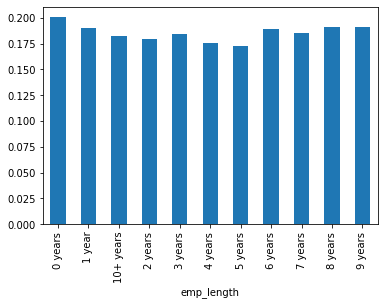

In [37]:
dataset.groupby("emp_length")["charged_off"].value_counts(normalize=True).loc[:,1].plot(kind="bar")

In [38]:
dataset.drop(['emp_length'], axis=1, inplace=True)

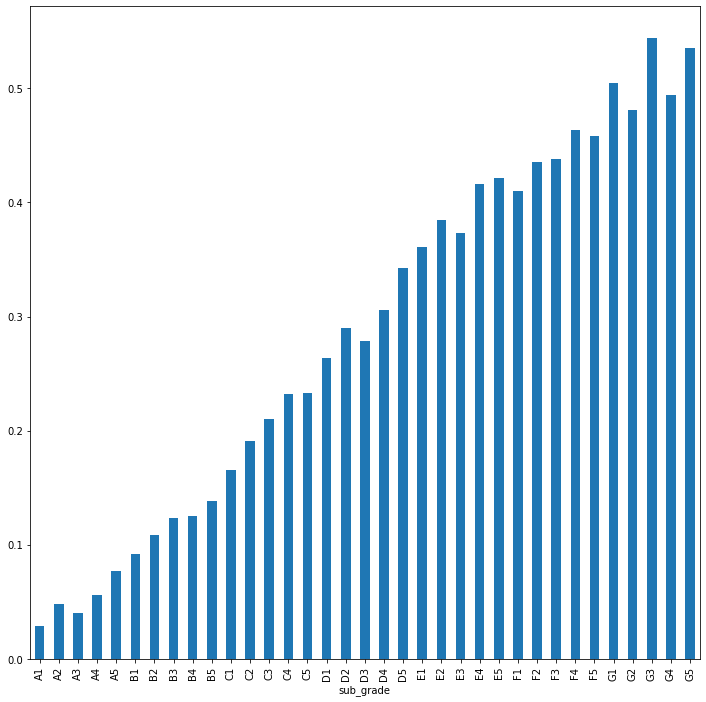

In [39]:
charge_off_rates = dataset.groupby('sub_grade')['charged_off'].value_counts\
(normalize=True).loc[:,1].plot(kind="bar",figsize=(12,12))


In [40]:
dataset["earliest_cr_line"] = dataset["earliest_cr_line"].apply(lambda s: int(s[-4:]))

In [41]:
dataset[["annual_inc"]].describe()

,annual_inc
count,8.613800e+04
mean,7.384311e+04
std,5.929352e+04
min,4.000000e+03
25%,4.500000e+04
50%,6.247372e+04
75%,9.000000e+04
max,7.500000e+06


In [42]:
dataset["log_annual_inc"] = dataset["annual_inc"].apply(lambda x: np.log10(x+1))


In [43]:
dataset["log_annual_inc"]

0        4.892100
1        4.763435
2        4.804827
4        4.698979
5        4.838855
           ...   
99994    4.924987
99995    4.959046
99996    4.725373
99998    4.716012
99999    4.778158
Name: log_annual_inc, Length: 86138, dtype: float64

In [44]:
dataset[["fico_range_low","fico_range_high"]].corr()

,fico_range_low,fico_range_high
fico_range_low,1.0,1.0
fico_range_high,1.0,1.0


In [46]:
dataset["fico_score"] = (dataset["fico_range_low"]+ dataset["fico_range_high"]) / 2

In [47]:
dataset.drop(["fico_range_low","fico_range_high"],axis=1,inplace=True)

In [48]:
from sklearn.preprocessing import LabelEncoder

In [55]:
categorical_cols = dataset.columns[dataset.dtypes==object].tolist()
le=LabelEncoder()
dataset[categorical_cols] = dataset[categorical_cols].apply(le.fit_transform)
dataset[categorical_cols].head(10)

,grade,sub_grade,home_ownership,verification_status,purpose,addr_state,initial_list_status,application_type
0,2,10,3,1,2,40,1,0
1,0,2,1,0,1,4,1,0
2,3,15,3,1,1,21,1,0
4,2,12,3,1,2,3,0,0
5,2,12,3,1,2,26,0,0
6,1,9,1,1,3,20,0,0
7,1,8,2,2,2,40,1,0
8,2,13,3,1,1,42,0,0
9,1,8,3,0,2,18,0,0
10,1,9,3,2,2,19,0,0


In [59]:
dataset[categorical_cols].nunique()

grade                   7
sub_grade              35
home_ownership          4
verification_status     3
purpose                13
addr_state             46
initial_list_status     2
application_type        1
dtype: int64

In [60]:
dataset.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off,log_annual_inc,fico_score
0,15000.0,15000.0,60,12.39,336.64,2,10,3,78000.0,1,...,29828.0,9525.0,4.7,244.0,1.0,0.0,4.0,0,4.892100,752.0
1,10400.0,10400.0,36,6.99,321.08,0,2,1,58000.0,0,...,9536.0,7599.0,41.5,290.0,1.0,1.0,9.0,1,4.763435,712.0
2,21425.0,21425.0,60,15.59,516.36,3,15,3,63800.0,1,...,4232.0,324.0,97.8,136.0,7.0,0.0,4.0,0,4.804827,687.0
4,7650.0,7650.0,36,13.66,260.20,2,12,3,50000.0,1,...,5857.0,332.0,93.2,148.0,8.0,0.0,4.0,1,4.698979,687.0
5,9600.0,9600.0,36,13.66,326.53,2,12,3,69000.0,1,...,3214.0,6494.0,69.2,265.0,23.0,0.0,7.0,0,4.838855,682.0


### 4.3 Sampling Data

In [62]:
dataset["charged_off"].value_counts()

0    69982
1    16156
Name: charged_off, dtype: int64

In [65]:
loansstatus_0 = dataset[dataset["charged_off"]==0].sample(5500)
loansstatus_1 = dataset[dataset["charged_off"]==1].sample(5500)
dataset = pd.concat([loanstatus_0,loanstatus_1])

NameError: name 'loanstatus_0' is not defined

In [68]:
loansstatus_1 = dataset[dataset["charged_off"]==1].sample(5500)
dataset = pd.concat([loansstatus_0,loansstatus_1])

In [75]:
dataset= dataset.sample(frac=1)

In [78]:
dataset.reset_index(drop=True,inplace=True)

In [79]:
dataset.head()

,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,avg_cur_bal,bc_open_to_buy,bc_util,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mort_acc,num_actv_rev_tl,charged_off,log_annual_inc,fico_score
0,20000.0,20000.0,36,6.49,612.89,0,1,1,55000.0,1,...,10471.0,15086.0,24.2,225.0,13.0,5.0,5.0,1,4.740371,777.0
1,2500.0,2500.0,36,12.99,84.23,2,10,1,160000.0,1,...,46615.0,1123.0,92.5,325.0,2.0,5.0,4.0,0,5.204123,682.0
2,10800.0,10800.0,36,14.49,371.70,2,13,3,38000.0,0,...,1679.0,3816.0,65.3,341.0,12.0,0.0,6.0,0,4.579795,662.0
3,6000.0,6000.0,36,11.67,198.35,1,8,1,98000.0,2,...,16294.0,375.0,97.0,188.0,2.0,3.0,8.0,0,4.991231,662.0
4,5300.0,5300.0,36,14.99,183.71,2,14,3,20000.0,0,...,2148.0,2967.0,76.0,102.0,3.0,0.0,5.0,1,4.301052,667.0


In [81]:
dataset.dtypes.sort_index()

acc_open_past_24mths     float64
addr_state                 int64
annual_inc               float64
application_type           int64
avg_cur_bal              float64
bc_open_to_buy           float64
bc_util                  float64
charged_off                int64
dti                      float64
earliest_cr_line           int64
fico_score               float64
funded_amnt              float64
grade                      int64
home_ownership             int64
initial_list_status        int64
installment              float64
int_rate                 float64
last_pymnt_amnt          float64
loan_amnt                float64
log_annual_inc           float64
mo_sin_old_rev_tl_op     float64
mo_sin_rcnt_rev_tl_op    float64
mort_acc                 float64
num_actv_rev_tl          float64
open_acc                 float64
purpose                    int64
revol_util               float64
sub_grade                  int64
term                       int64
verification_status        int64
dtype: obj

In [82]:
dataset.drop('annual_inc', axis=1, inplace=True)

In [84]:
dataset.shape

(11000, 29)

In [85]:
test_dataset = pd.DataFrame(dataset)

In [87]:
test_dataset.fillna(test_dataset.mode(),inplace=True)

In [88]:
test_dataset.isna().sum()

loan_amnt                  0
funded_amnt                0
term                       0
int_rate                   0
installment                0
grade                      0
sub_grade                  0
home_ownership             0
verification_status        0
purpose                    0
addr_state                 0
dti                        0
earliest_cr_line           0
open_acc                   0
revol_util                 5
initial_list_status        0
last_pymnt_amnt            0
application_type           0
acc_open_past_24mths       0
avg_cur_bal                0
bc_open_to_buy           128
bc_util                  137
mo_sin_old_rev_tl_op       0
mo_sin_rcnt_rev_tl_op      0
mort_acc                   0
num_actv_rev_tl            0
charged_off                0
log_annual_inc             0
fico_score                 0
dtype: int64

In [89]:
dataset.fillna(dataset.mean(),inplace=True)

In [90]:
dataset.isna().any()

loan_amnt                False
funded_amnt              False
term                     False
int_rate                 False
installment              False
grade                    False
sub_grade                False
home_ownership           False
verification_status      False
purpose                  False
addr_state               False
dti                      False
earliest_cr_line         False
open_acc                 False
revol_util               False
initial_list_status      False
last_pymnt_amnt          False
application_type         False
acc_open_past_24mths     False
avg_cur_bal              False
bc_open_to_buy           False
bc_util                  False
mo_sin_old_rev_tl_op     False
mo_sin_rcnt_rev_tl_op    False
mort_acc                 False
num_actv_rev_tl          False
charged_off              False
log_annual_inc           False
fico_score               False
dtype: bool

### 5:Evaluate Alg

In [93]:
Y = dataset["charged_off"]
X = dataset.loc[:,dataset.columns !="charged_off"]
validation_size = 0.2
seed = 7

In [94]:
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=validation_size, random_state=seed)



In [95]:
# test options for classification
num_folds = 10
seed = 7
#scoring = 'accuracy'
#scoring ='precision'
#scoring ='recall'
scoring = 'roc_auc'

In [101]:
# spot check the algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

#Ensable Models 
# Boosting methods
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
##############################
models.append(("XGB",XGBClassifier()))


In [102]:
estimators = []
estimators.append(LogisticRegression(max_iter=10000))
estimators.append(XGBClassifier(max_depth=2, n_estimators=500, learning_rate=0.1))
estimators.append(RandomForestClassifier(random_state=2))

models.append(('VOTE', VotingClassifier(estimators)))

In [103]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.901608 (0.008655)
LDA: 0.902023 (0.010416)
KNN: 0.817957 (0.013717)
CART: 0.798207 (0.011479)
NB: 0.903757 (0.010507)
AB: 0.929289 (0.006413)
GBM: 0.938664 (0.005546)
RF: 0.931887 (0.006957)
ET: 0.920870 (0.007775)
[08:35:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:31] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[08:35:33] WARNING: ../